# Tarea N°2 - Máquinas de Aprendizaje - ILI393
### Martín Villanueva A.

## Introducción

## Parte 1 - Evaluación de Créditos

### Linear Discriminant Analysis

In [230]:
solve_clf('LDA', 'credit', data_func=normalize)

##############################################################
Dataset: 0
Training error: 0.0777777777778
Testing error: 0.133333333333
##############################################################


##############################################################
Dataset: 1
Training error: 0.0555555555556
Testing error: 0.1
##############################################################


##############################################################
Dataset: 2
Training error: 0.0222222222222
Testing error: 0.133333333333
##############################################################


##############################################################
Dataset: 3
Training error: 0.0555555555556
Testing error: 0.166666666667
##############################################################


##############################################################
Dataset: 4
Training error: 0.0555555555556
Testing error: 0.1
##############################################################


#################

### Naive Bayes

### Primal Perceptron

In [231]:
#parameters to try on primal perceptron
nus = np.linspace(1e-3, 1e-1, 5, endpoint=True)

##############################################################
Dataset: 0
Best parameter: 0.001


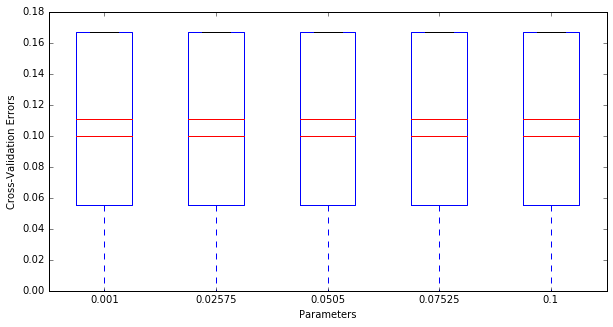

Training error: 0.0
Testing error: 0.1
##############################################################


##############################################################
Dataset: 1
Best parameter: 0.001


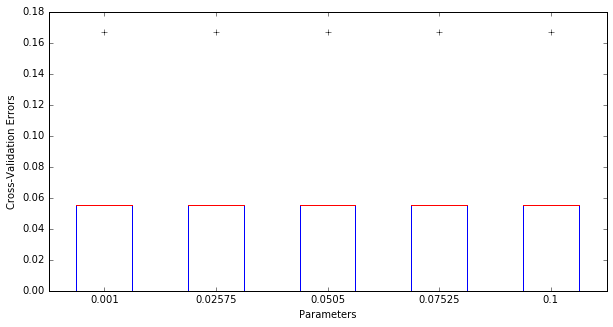

Training error: 0.0
Testing error: 0.0666666666667
##############################################################


##############################################################
Dataset: 2
Best parameter: 0.001


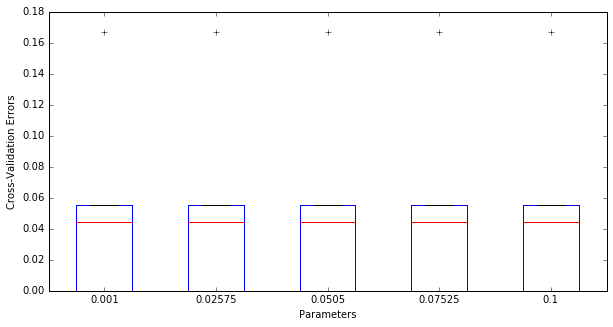

Training error: 0.0
Testing error: 0.133333333333
##############################################################


##############################################################
Dataset: 3
Best parameter: 0.001


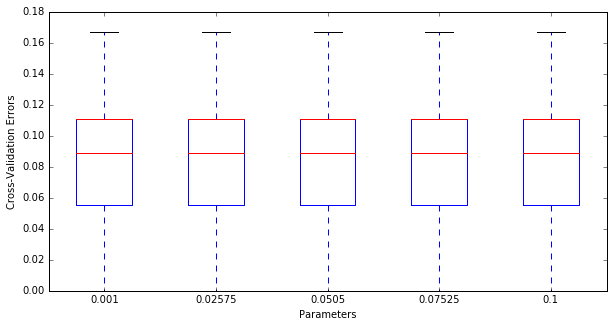

Training error: 0.0222222222222
Testing error: 0.0333333333333
##############################################################


##############################################################
Dataset: 4
Best parameter: 0.001


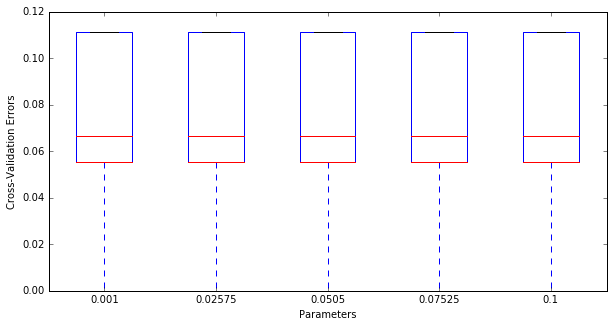

Training error: 0.0333333333333
Testing error: 0.1
##############################################################


##############################################################
Dataset: 5
Best parameter: 0.001


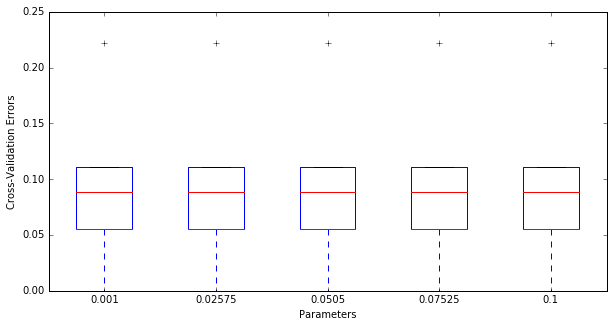

Training error: 0.0333333333333
Testing error: 0.1
##############################################################


##############################################################
Dataset: 6
Best parameter: 0.001


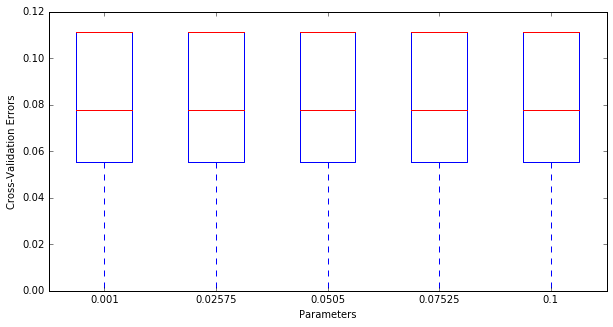

Training error: 0.0333333333333
Testing error: 0.0333333333333
##############################################################


##############################################################
Dataset: 7
Best parameter: 0.001


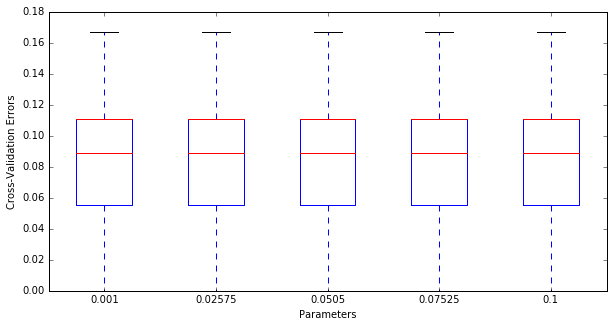

Training error: 0.0222222222222
Testing error: 0.1
##############################################################


##############################################################
Dataset: 8
Best parameter: 0.001


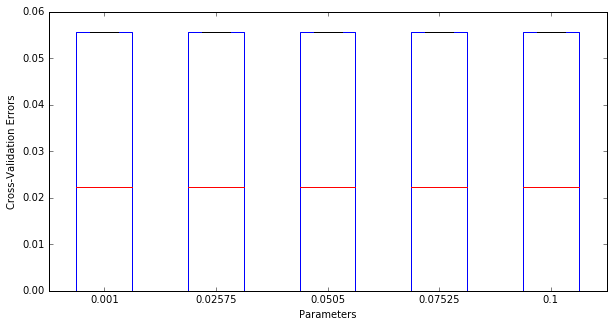

Training error: 0.0
Testing error: 0.0666666666667
##############################################################


##############################################################
Dataset: 9
Best parameter: 0.001


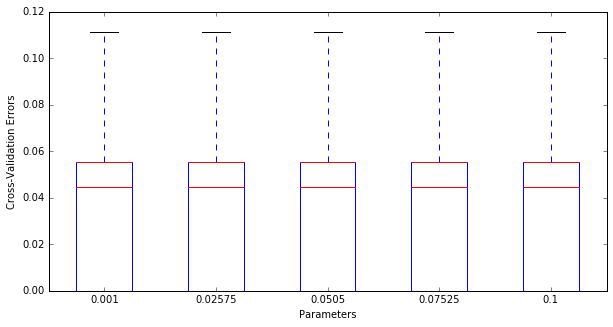

Training error: 0.0
Testing error: 0.2
##############################################################


##############################################################
Dataset: 10
Best parameter: 0.001


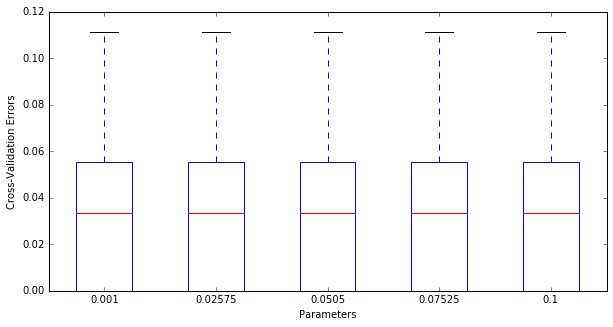

Training error: 0.0
Testing error: 0.0666666666667
##############################################################


##############################################################
Dataset: 11
Best parameter: 0.001


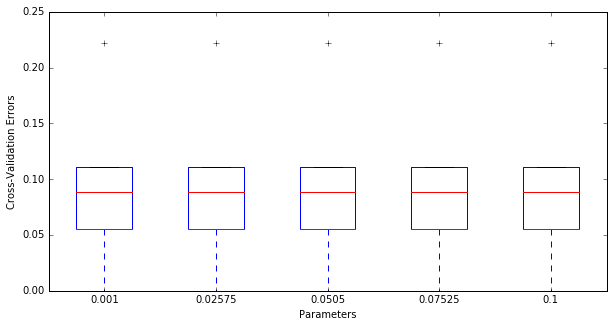

Training error: 0.0
Testing error: 0.166666666667
##############################################################


##############################################################
Dataset: 12
Best parameter: 0.001


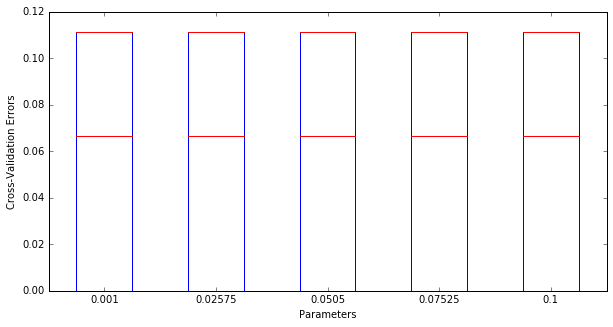

Training error: 0.0333333333333
Testing error: 0.2
##############################################################


##############################################################
Dataset: 13
Best parameter: 0.001


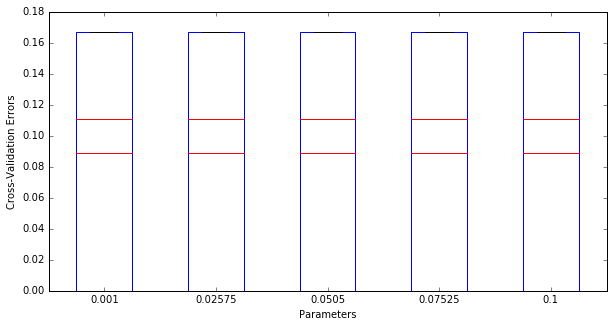

Training error: 0.0
Testing error: 0.166666666667
##############################################################


##############################################################
Dataset: 14
Best parameter: 0.001


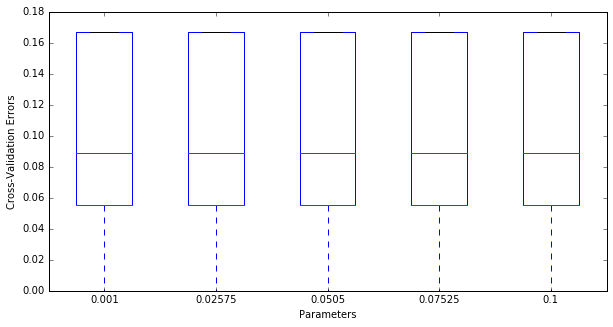

Training error: 0.0
Testing error: 0.0333333333333
##############################################################


##############################################################
Dataset: 15
Best parameter: 0.001


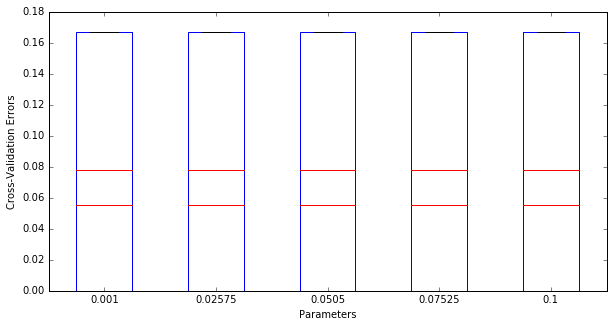

Training error: 0.0444444444444
Testing error: 0.133333333333
##############################################################


##############################################################
Dataset: 16
Best parameter: 0.001


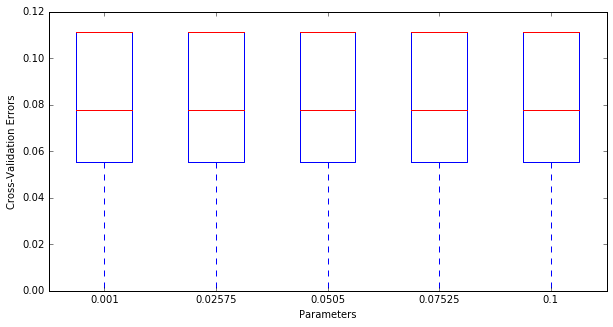

Training error: 0.0
Testing error: 0.166666666667
##############################################################


##############################################################
Dataset: 17
Best parameter: 0.001


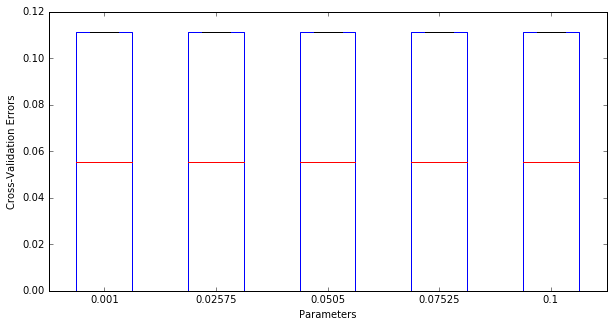

Training error: 0.0
Testing error: 0.166666666667
##############################################################


##############################################################
Dataset: 18
Best parameter: 0.001


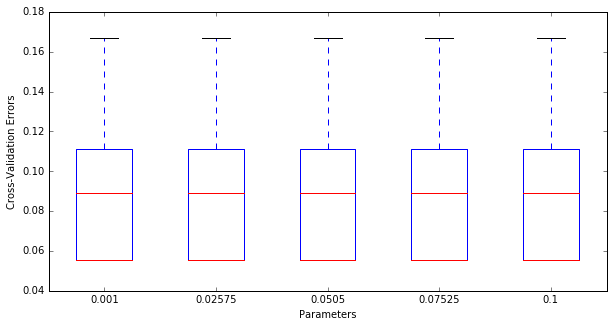

Training error: 0.0333333333333
Testing error: 0.0333333333333
##############################################################


##############################################################
Dataset: 19
Best parameter: 0.001


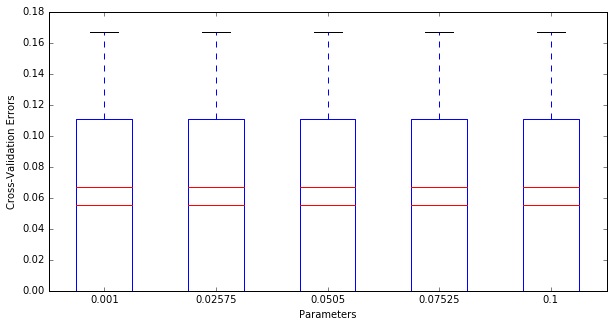

Training error: 0.0333333333333
Testing error: 0.1
##############################################################




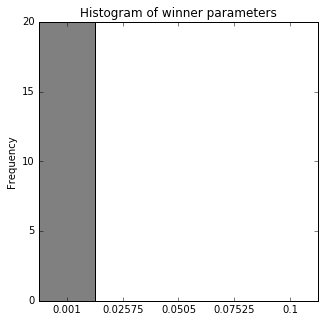

In [232]:
solve_clf('PP', 'credit', params=nus, data_func=normalize)

### Support Vector Machine with Linear Kernel

## Parte 2 - Pima Indians Diabetes

## Conclusiones

## Anexo

### Configuración del notebook

In [26]:
#notebook settings
%matplotlib inline

#import some useful libraries and utilities
import numba
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cross_validation import KFold
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.grid_search import GridSearchCV

#setting some paths
path1 = './credit/'
#data directory
path2 = './diabetes/'

### Funciones para el manejo de la data

In [2]:
#Rescale features of M to [a,b] range
def rescale(M, a=0., b=1.):
    #max and min vectors
    maxv = np.max(M, axis=0)
    minv = np.min(M, axis=0)
    return (b-a)*M/(maxv-minv) + (a*maxv-b*minv)/(maxv-minv)

#Normalize features of M
def normalize(M):
    #mean and standard deviation vectors
    meanv = np.mean(M, axis=0)
    stdv = np.std(M, axis=0)
    return (M-meanv)/stdv

## Métricas de error para clasificación

In [3]:
#precision
def precision(yreal, ypred):
    yr = yreal.astype(int)
    yp = ypred.astype(int)
    m, = yr.shape
    #number of good predictions/number of predictions
    return np.sum(yp==yr)/np.float(m)

#error rate 
def error_rate(yreal, ypred):
    return 1.-precision(yreal, ypred)

## Implementación de LDA

In [4]:
class LDA(BaseEstimator,ClassifierMixin):
    def __init_(self):
        pass
    
    def fit(self, X, y):
        #boolean masks
        mask1 = y.astype(bool)
        mask0 = np.logical_not(mask1)
        #number of samples in each class
        M,_ = X.shape
        M0 = np.sum(mask0)
        M1 = M-M0
        #estimates of probabilities
        p0 = M0/np.float(M)
        p1 = 1-p0
        #estimates of means
        u0 = X[mask0].sum(axis=0)/M0
        u1 = X[mask1].sum(axis=0)/M1
        #estimation of shared covariance matrix
        Y = X.copy()
        Y[mask0] -= u0
        Y[mask1] -= u1
        Cov = np.dot(Y.T,Y)
        Cov /= (M-2.)
        #computing parameters of linear discriminants
        self.w0 = np.linalg.solve(Cov,u0)
        self.b0 = np.log(p0) - 0.5*np.dot(u0, self.w0)
        self.w1 = np.linalg.solve(Cov,u1)
        self.b1 = np.log(p1) - 0.5*np.dot(u1, self.w1)
    
    def predict(self, X):
        #evaluation of discriminant hyperplane
        return (np.dot(X,self.w1-self.w0) > self.b0-self.b1)

## Implementación de Naive Bayes

In [5]:
class NB(BaseEstimator,ClassifierMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y, k, features):
        #boolean masks
        mask1 = y.astype(bool)
        mask0 = np.logical_not(mask1)
        #number of samples in each class
        M,N = X.shape
        M0 = np.sum(mask0)
        M1 = M-M0
        #estimates of probabilities
        p0 = M0/np.float(M)
        p1 = 1-p0
        #separating data by classes
        X0 = X[mask0]
        X1 = X[mask1]
        #conditional probabilities of features in each class
        CP0 = list()
        CP1 = list()
        #matrix of bins for each feature
        B0 = np.emtpy((len(features),k+1))
        B1 = np.empty((len(features),k+1))
        ind = 0
        
        #tolerance on interval extremes of discretization
        eps = 1e-10
        
        #computing conditional probabilities of features
        for f in xrange(N):
            #discretization needed
            if f in features:
                tmp0 = X0[:,f]
                tmp1 = X1[:,f]
                bins0 = np.linspace(tmp0.min()-eps, tmp0.max()+eps, k+1, endpoint=True)
                bins1 = np.linspace(tmp1.min()-eps, tmp1.max()+eps, k+1, endpoint=True)
                CP0.append(np.bincount(np.digitize(tmp0, bins0), minlength=k+2)/M0)
                CP1.append(np.bincount(np.digitize(tmp1, bins1), minlength=k+2)/M1)
                B0[ind] = bins0
                B1[ind] = bins1
                ind += 1
            #no discretization needed
            else:
                tmp0 = X0[:,f].astype(int)
                tmp1 = X1[:,f].astype(int)
                CP0.append(np.bincount(tmp0, minlength=np.max(tmp0)+2)/M0)
                CP1.append(np.bincount(tmp1, minlength=np.max(tmp1)+2)/M1)
                
        #storing needed data
        self.features = features
        self.p0 = p0
        self.p1 = p1 
        self.CP0 = CP0
        self.CP1 = CP1
        self.B0 = B0
        self.B1 = B1
        
    def predict(self, X):
        M,N = X.shape
        scores0 = np.ones(M)
        scores1 = np.ones(M)
        for f in xrange(N):
            ##discretization needed
            if f in self.features:
                
            #no discretization needed
            else:
        
        return

IndentationError: expected an indented block (<ipython-input-5-88f62aaa5b4e>, line 68)

## Implementación de Primal Perceptron

In [6]:
class PP(BaseEstimator,ClassifierMixin):
    def __init__(self, eta=0.01, n_iter=100000, tol=25):
        self.eta = eta
        self.n_iter = n_iter
        self.tol = tol
    
    def f(self, X):
        return np.dot(X,self.w)+self.b
    
    def fit(self, X, y):
        M,N = X.shape
        #initial guesses
        self.w = np.zeros(N)
        self.b = 0.
        #R parameter
        R = np.max(np.linalg.norm(X, axis=1))
        #error rate and counter
        err1 = error_rate(y, self.predict(X))
        c = 0
        
        for i in xrange(self.n_iter):
            #error rate at previous iteration
            err0 = err1
            for m in xrange(M):
                #if misclassified
                if y[m]*self.f(X[m])<=0:
                    self.w += self.eta*y[m]*X[m]
                    self.b += self.eta*y[m]*R**2
            err1 = error_rate(y, self.predict(X))
            #stopping criterions
            if err1==0.: break
            elif err0==err1:
                c += 1
                if c > self.tol: break
            else: c = 0
        #store the number of iterations needed
        self.it = i+1
        return self
        
    def predict(self, X):
        return np.sign(self.f(X))
    
    #to make it compatible with scikit
    def score(self, X, y):
        return precision(y, self.predict(X))

+ La primera vez que se implemento, en la regla de actualización para $b$ se puso equívocamente: $b \leftarrow b + \nu y_m R \ $    en vez de $R^2$, y los resultados obtenidos fueron mucho mejores.

In [7]:
wa = np.load(path1+'credit-tr-1.npy')
X = normalize(wa[:,:-1])
y = wa[:,-1]
y[y==0.]=-1

In [8]:
pp = PP()
params = {'eta':np.linspace(0.01, 10., 5, endpoint=True)}
gs = GridSearchCV(pp, params, cv=5, n_jobs=2)
gs.fit(X, y)
#clf.fit(X, y)
#print clf.score(X,y)
#print clf.b
#print clf.w
#print clf.it

GridSearchCV(cv=5, error_score='raise',
       estimator=PP(eta=0.01, n_iter=100000, tol=25), fit_params={},
       iid=True, n_jobs=2,
       param_grid={'eta': array([  0.01  ,   2.5075,   5.005 ,   7.5025,  10.    ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [9]:
gs.grid_scores_

[mean: 0.92222, std: 0.07565, params: {'eta': 0.01},
 mean: 0.92222, std: 0.07565, params: {'eta': 2.5074999999999998},
 mean: 0.92222, std: 0.07565, params: {'eta': 5.0049999999999999},
 mean: 0.92222, std: 0.07565, params: {'eta': 7.5024999999999995},
 mean: 0.92222, std: 0.07565, params: {'eta': 10.0}]

In [10]:
print gs.best_params_

{'eta': 0.01}


## Implementación de Dual Perceptron

In [46]:
class DP(BaseEstimator,ClassifierMixin):
    def __init__(self, eta=0.01, gamma=0.5, n_iter=100000, tol=25):
        self.eta = eta
        self.gamma = gamma
        self.n_iter = n_iter
        self.tol = tol
        pass

    def fit(self, X, y):
        M,N = X.shape
        #store data
        self.X = X
        self.y = y
        #initial guesses
        self.alp = np.zeros(M)
        self.b = 0.
        #R parameter
        R = np.max(np.linalg.norm(X, axis=1))
        #precomputed kernel matrix
        self.K = rbf_kernel(X, gamma=self.gamma)
        #error rate and counter
        err1 = error_rate(y, self.predict(X))
        c = 0
        
        for i in xrange(self.n_iter):
            #error rate at previous iteration
            err0 = err1
            for m in xrange(M):
                #if misclassified
                if y[m]*(np.sum(self.alp*y*self.K[m])+self.b)<=0:
                    self.alp[m] += 1
                    self.b += self.eta*y[m]*R**2
            err1 = error_rate(y, self.predict(X))
            #stopping criterions
            if err1==0.: break
            elif err0==err1:
                c += 1
                if c > self.tol: break
            else: c = 0
        #store the number of iterations needed
        self.it = i+1
        return self
        
    def predict(self, X):
        if np.array_equal(X, self.X):
            K = self.K
        else:
            #compute the kernel matrix
            K = rbf_kernel(X, self.X, self.gamma)
        f = np.sum(self.alp*self.y*K, axis=1)+self.b
        return np.sign(f)
    
    #to make it compatible with GridSearch
    def score(self, X, y):
        return precision(y, self.predict(X))

In [47]:
wa = np.load(path2+'diabetes-tr-0.npy')
X = normalize(wa[:,:-1])
y = wa[:,-1]
y[y==0.]=-1

In [48]:
dp = DP(gamma=1., eta=1.)
%timeit dp.fit(X,y)

10 loops, best of 3: 68.2 ms per loop


In [14]:
dp = DP()
params = {'gamma':np.linspace(0.1, 2., 5, endpoint=True), 'eta':np.linspace(0.01, 10., 5, endpoint=True)}
gs = GridSearchCV(dp, params, cv=5, n_jobs=4)
gs.fit(X, y)
#dp = DP()
#dp.fit(X, y)
#print dp.b
#print dp.it

GridSearchCV(cv=5, error_score='raise',
       estimator=DP(eta=0.01, gamma=0.5, n_iter=100000, tol=25),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'eta': array([  0.01  ,   2.5075,   5.005 ,   7.5025,  10.    ]), 'gamma': array([ 0.1  ,  0.575,  1.05 ,  1.525,  2.   ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [15]:
gs.grid_scores_

[mean: 0.66493, std: 0.01883, params: {'eta': 0.01, 'gamma': 0.10000000000000001},
 mean: 0.67535, std: 0.02606, params: {'eta': 0.01, 'gamma': 0.57499999999999996},
 mean: 0.68229, std: 0.01780, params: {'eta': 0.01, 'gamma': 1.05},
 mean: 0.66840, std: 0.01328, params: {'eta': 0.01, 'gamma': 1.5249999999999999},
 mean: 0.68229, std: 0.02526, params: {'eta': 0.01, 'gamma': 2.0},
 mean: 0.65104, std: 0.05237, params: {'eta': 2.5074999999999998, 'gamma': 0.10000000000000001},
 mean: 0.67361, std: 0.02499, params: {'eta': 2.5074999999999998, 'gamma': 0.57499999999999996},
 mean: 0.67188, std: 0.01930, params: {'eta': 2.5074999999999998, 'gamma': 1.05},
 mean: 0.65972, std: 0.02400, params: {'eta': 2.5074999999999998, 'gamma': 1.5249999999999999},
 mean: 0.65278, std: 0.02576, params: {'eta': 2.5074999999999998, 'gamma': 2.0},
 mean: 0.62326, std: 0.03213, params: {'eta': 5.0049999999999999, 'gamma': 0.10000000000000001},
 mean: 0.67361, std: 0.02499, params: {'eta': 5.0049999999999999, '

In [16]:
print gs.best_params_

{'eta': 0.01, 'gamma': 1.05}


In [170]:
wa = np.load(path2+'diabetes-tr-10.npy')
print wa[:,7]

[ 22.  27.  28.  56.  60.  25.  25.  24.  31.  43.  31.  22.  46.  39.  40.
  34.  22.  34.  57.  25.  65.  33.  26.  26.  42.  25.  33.  36.  30.  42.
  41.  28.  23.  23.  29.  36.  24.  22.  48.  46.  51.  29.  22.  36.  50.
  22.  21.  27.  27.  45.  34.  22.  57.  22.  22.  30.  57.  36.  31.  46.
  22.  38.  33.  28.  36.  25.  36.  28.  31.  38.  25.  27.  23.  22.  28.
  55.  21.  33.  37.  55.  28.  33.  39.  33.  22.  22.  34.  55.  21.  22.
  21.  28.  27.  50.  47.  29.  50.  21.  27.  66.  24.  50.  28.  36.  32.
  22.  22.  27.  31.  23.  43.  52.  51.  24.  33.  26.  28.  22.  24.  30.
  25.  52.  46.  45.  22.  24.  42.  22.  27.  45.  66.  52.  41.  30.  21.
  31.  39.  72.  29.  50.  51.  66.  23.  45.  40.  33.  22.  38.  29.  40.
  43.  29.  51.  32.  59.  25.  22.  36.  33.  24.  21.  21.  43.  34.  23.
  51.  24.  25.  26.  28.  27.  24.  34.  28.  66.  69.  25.  23.  28.  42.
  21.  21.  50.  45.  30.  29.  23.  46.  25.  22.  21.  41.  25.  24.  23.
  38.  21.  

In [212]:
wa = np.load(path2+'diabetes-tr-10.npy')
X = wa[:,:-1]
y = wa[:,-1]
#boolean masks
mask1 = y.astype(bool)
mask0 = np.logical_not(mask1)
#number of samples in each class
M,_ = X.shape
M0 = np.sum(mask0)
M1 = M-M0
#estimates of probabilities
p0 = M0/np.float(M)
p1 = 1-p0
#separating data by class
X0 = X[mask0]
X1 = X[mask1]

f = X0[:,1]
eps = 1e-10
bins = np.linspace(t.min()-eps,t.max()+eps, 6, endpoint=True)
print np.digitize(f, bins)
print np.bincount(np.digitize(f, bins), minlength=7)

[3 3 3 4 3 3 5 3 3 3 4 3 4 4 3 4 3 4 3 2 3 3 3 3 4 3 3 3 3 4 3 4 3 3 3 3 3
 4 4 3 3 3 3 3 3 3 3 4 3 3 3 3 3 4 3 5 3 3 3 3 3 4 4 4 5 4 3 4 5 3 3 3 4 3
 3 2 3 4 5 3 3 3 5 3 3 2 4 3 3 2 3 3 2 4 4 4 5 3 4 4 3 4 4 4 3 4 4 3 5 3 3
 3 4 3 3 3 4 3 3 4 4 4 3 4 2 3 5 2 2 4 3 3 3 3 3 3 3 3 3 3 4 2 2 4 4 4 3 4
 4 2 3 3 3 5 3 3 4 4 3 4 3 4 4 3 4 3 3 3 3 3 3 2 3 4 3 3 4 4 3 3 4 2 3 4 3
 4 2 4 3 3 3 3 3 3 4 3 3 3 3 2 5 3 4 3 5 3 3 3 3 4 3 4 4 2 4 4 3 5 3 4 3 4
 3 4 4 3 3 4 4 4 3 3 3 3 3 3 2 4 4 4 3 3 3 4 3 3 3 3 3 4 3 4 2 3 4 3 4 4 4
 3 2 4 3 3 4 4 3 4 3 4 3 4 3 3 3 4 1 2 3 3 4 3 3 4 3 3 3 5 5 2 3 4 2 3 3 4
 4 4 3 3 4 3 3 4 3 3 2 3 3 4 1 3 3 4 3 3 3 3 3 3 3 4 3 3 3 4 2 3 3 3 4 3 3
 2 3 3 3 3 5 2 5 2 3 4 3 3 4 3 4 3 4 4 4 3 3 3 3 3 4 3 3 3 3 3 4 4 4 3 3 4
 4 3 3 3 3 3 2 3 3 4 4 3 3 5]
[  0   2  28 221 115  18   0]


## Cross validation functions

In [224]:
""" 
> find the best parameter for classification algorithms, between 
  parameters in params using 5-fold cross validation.
> for algorithm with 1 parameter
"""
def cross(clf, X, y, params):
    #creating kfold
    m,n = X.shape
    kf = KFold(m, n_folds=5)
    cv_err = np.empty((5,5))
    i = 0 #index of fold
    
    #iterate through folds
    for tr_index,ts_index in kf:
        j = 0 #index of parameter
        X_tr, X_ts = X[tr_index], X[ts_index]
        y_tr, y_ts = y[tr_index], y[ts_index]
        #iterate through parameters to try
        for param in params:
            clf.fit(X_tr, y_tr, param)
            cv_err[i,j] = error_rate(y_ts, clf.predict(X_ts))
            j += 1
        i += 1
        
    #arrays with mean cv-error for each alpha
    cv_mean = np.mean(cv_err, axis=0)
    return params[np.argmin(cv_mean)], cv_err

## Funciones complementarias (helpers) para obtener resultados

In [229]:
"""
Function to generate histogram of winners
"""
def make_hist(winners,params):
    winners = np.array(winners)
    freqs = np.zeros(5)
    for i in xrange(5):
        freqs[i] = np.sum(params[i]==winners)

    labels = map(str,params)
    pos = np.arange(len(labels))
    width = 1.0
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(5)
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(labels)
    plt.ylabel('Frequency')
    plt.title('Histogram of winner parameters')
    plt.bar(pos, freqs, width, color='0.5')
    plt.show()

"""
Generate solutions for classification problems
"""
def solve_clf(algorithm, dataset, params=None, grid=None, data_func=None, show=None):
    if params is not None:
        winners = list()
        
    #set dataset name
    if dataset=='credit':
        path = './credit/credit'
    elif dataset=='diabetes':
        path = './diabetes/diabetes'
    else: return -1
    
    #set classifier
    if algorithm=='LDA':
        clf = LDA()
    elif algorithm=='NB':
        clf = NB()
    elif algorithm=='PP':
        clf = PP()
    elif algorithm=='DP':
        clf = DP()
    elif algorithm=='SVM':
        clf = svm.SVC()
    else: return -1
    
    #iterate through data
    for i in xrange(20):
        #loading dataset
        tr_file = path+'-tr-{0}.npy'.format(i)
        ts_file = path+'-ts-{0}.npy'.format(i)
        tr_data = np.load(tr_file)
        ts_data = np.load(ts_file)
        
        if data_func is not None:
            X_tr = data_func(tr_data[:,:-1])
            X_ts = data_func(ts_data[:,:-1])
        else: 
            X_tr = tr_data[:,:-1]
            X_ts = ts_data[:,:-1]
        y_tr = np.ascontiguousarray(tr_data[:,-1])
        y_ts = np.ascontiguousarray(ts_data[:,-1])
        if algorithm in ['PP', 'DP', 'SVM']:
            #change label for separating hyperplanes approaches
            y_tr[y_tr==0.] = -1
            y_ts[y_ts==0. ]= -1

        if params is not None:
            param,cv_err = cross(clf, X_tr, y_tr, params)
            winners.append(param)
            clf.fit(X_tr, y_tr, param)
        else:
            clf.fit(X_tr, y_tr)
        
        if (show is not None) and (i not in show): continue
        print "##############################################################"
        print "Dataset: {0}".format(i)
        if params is not None:
            print 'Best parameter: {0}'.format(param)
            fig = plt.figure()
            fig.set_figheight(5)
            fig.set_figwidth(10)
            plt.xlabel('Parameters')
            plt.ylabel('Cross-Validation Errors')
            plt.boxplot(cv_err, showmeans=True, meanline=True)
            plt.xticks([1, 2, 3, 4, 5], map(str,params))
            plt.show()
        print 'Training error: {0}'.format(error_rate(y_tr, clf.predict(X_tr)))
        print 'Testing error: {0}'.format(error_rate(y_ts, clf.predict(X_ts)))
        print "##############################################################"
        print '\n'
    
    if params is not None:
        make_hist(winners,params)